# Data analisys of Airbnb Boston
The goal of this notebook to help the travelers making better decision on future books in Boston on Airbnb by data science. This project is focusing on the open source Airbnb Boston data set to three following questions:

#### 1. What is availability of Boston Airbnb through the year?
#### 2. Which is the most expensive and cheapest neighborhood in Boston? And what is the neighborhoods distribution?
#### 3. What are the top 10 features that influence the listing price?
Those questions were answered through out this notebook.

The data is from https://www.kaggle.com/airbnb/boston 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data

In [205]:
listings = pd.read_csv("listings.csv")
calendar = pd.read_csv("calendar.csv")

## EDA (Exploratory data analysis) 

In [274]:
# take a look for reviews dataset
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [275]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [276]:
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [277]:
print("Boston Airbnb calendar database shape = ", calendar.shape)

Boston Airbnb calendar database shape =  (1308890, 4)


In [3]:
# take a look for listings dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [193]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [10]:
print("Boston Airbnb listings database shape = ", listings.shape)

Boston Airbnb listings database shape =  (3585, 95)


In [206]:
# price distrubution
# removing the dollar sign and single qoute from price column
listings['price'] = listings['price'].str.replace('[\$\',]', '').astype('float64')

In [159]:
price_count = listings['price'].value_counts().sort_index()
price_count

10.0       1
11.0       1
20.0       2
22.0       2
25.0       3
27.0       3
28.0       2
29.0       4
30.0       8
31.0       8
32.0       3
33.0       4
34.0       1
35.0      15
36.0       1
37.0       2
38.0       2
39.0       9
40.0      24
41.0       2
42.0       3
44.0       5
45.0      41
46.0       4
47.0       4
48.0       7
49.0      15
50.0      50
51.0       3
52.0       9
          ..
570.0      1
575.0      1
599.0      1
600.0     11
603.0      4
625.0      1
650.0      3
680.0      1
690.0      1
695.0      1
699.0      2
700.0      4
725.0      1
750.0      2
769.0      1
800.0      1
849.0      1
872.0      1
975.0      1
999.0      1
1000.0     2
1235.0     1
1250.0     2
1275.0     1
1300.0     1
1345.0     1
1372.0     1
1400.0     1
3000.0     1
4000.0     1
Name: price, Length: 324, dtype: int64

#### Visualization of percentage of price distribution

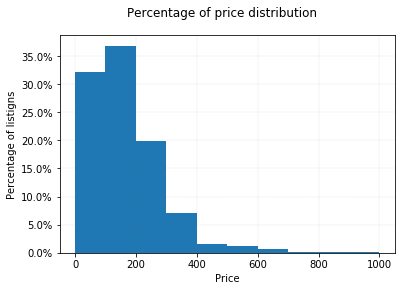

In [281]:
# Percentage of price distribution
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots()
plt.hist(price,weights=np.ones(len(price)) / len(price), range=[0, 1000])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(color='grey', linestyle=':', linewidth=0.2)
fig.suptitle('Percentage of price distribution')
plt.xlabel('Price')
plt.ylabel('Percentage of listigns')
plt.show()

here are total more than 65% of listing below 200 dallors. And around 20% of listing between 200 and 300 dallors. Thus, there are over 85% of listing below 300 dallors.

#### Visualization of different property types

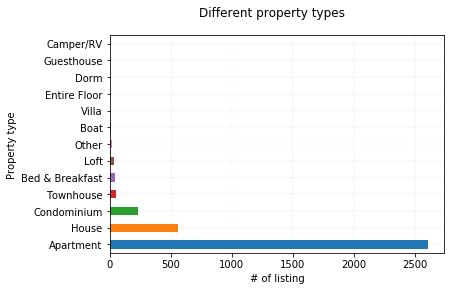

In [283]:
# Property type distrubution
fig, axs = plt.subplots()
listings.property_type.value_counts().plot.barh()
plt.grid(color='grey', linestyle=':', linewidth=0.2)
fig.suptitle('Different property types')
plt.xlabel('# of listing')
plt.ylabel('Property type')
plt.show()

Apartment is the majority of the listing.

## What is availability of Boston Airbnb through the year?

#### Data Preparation

In [93]:
# each day's total availability by grouping 'date' and sum up the 'avilable' where is 't'
ava_count = calendar.groupby('date').apply(lambda x: (x == 't').sum())[['available']]

In [122]:
# changing column name available to total_availability
ava_count = ava_count.rename({'available':'total_availability'}, axis='columns')
ava_count.head()

,total_availability
date,
2016-09-06,570
2016-09-07,932
2016-09-08,999
2016-09-09,981
2016-09-10,956


#### Visualization of total home availablity

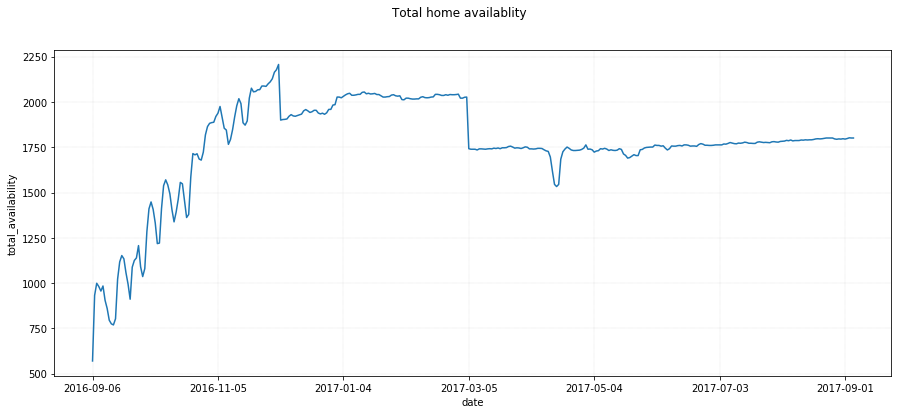

In [286]:
# Total home availablity
f, ax = plt.subplots(figsize=(15, 6))

ax = sns.lineplot(data = ava_count, x=ava_count.index, y='total_availability', legend=False)
xtix = ax.get_xticks()
ax.set(xticks = (xtix[::60]))
plt.grid(color='grey', linestyle=':', linewidth=0.2)
f.suptitle('Total home availablity')
plt.show()

More availability towords December. Less availability during summer.

## Which is the most expensive and cheapest neighborhood in Boston? And what is the neighborhoods distribution?

#### Data Preparation

In [160]:
# average price for each neighborhood
ave_neighborhood_price = listings.groupby('neighbourhood_cleansed').mean()[['price']]

#### Data Analyze

In [163]:
# Top 5 cheapest neighborhoods
ave_neighborhood_price.sort_values(by=['price']).head()

,price
neighbourhood_cleansed,
Mattapan,75.125000
Hyde Park,86.548387
Dorchester,91.639405
Roslindale,98.428571
West Roxbury,107.108696


In [278]:
# Top 5 most expensive neighborhoods
ave_neighborhood_price.sort_values(by=['price'], ascending=False).head()

,price
neighbourhood_cleansed,
South Boston Waterfront,306.060241
Bay Village,266.833333
Leather District,253.600000
Back Bay,240.950331
Downtown,236.459302


#### Visualization of Listing neighborhoods distribution

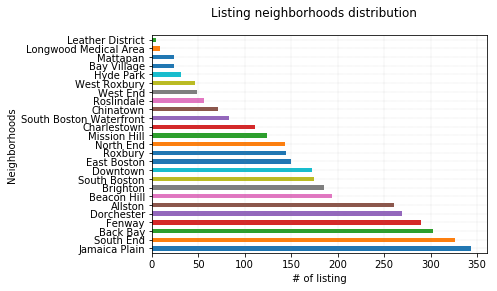

In [288]:
# Airbnb neighborhood distribution
fig, axs = plt.subplots()
listings.neighbourhood_cleansed.value_counts().plot.barh()
plt.grid(color='grey', linestyle=':', linewidth=0.2)
fig.suptitle('Listing neighborhoods distribution')
plt.xlabel('# of listing')
plt.ylabel('Neighborhoods')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfEAAAEjCAYAAAAixDhZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnXmYXEXZvu+HJEDYBQIkCASRHSRsKhggLC4oyCYfKCCLiqiAfCiIqBgBBQFBWZQfIhCQJYLsoOLHFggYSCAk7IoEWcISlpBAJMnw/P6oOpkzne7p7snM9FSo+7rmSvc5daqe09OZOlX1vk/JNplMJpPJZNJjkVYLyGQymUwm0zVyJ57JZDKZTKLkTjyTyWQymUTJnXgmk8lkMomSO/FMJpPJZBIld+KZTCaTySRK7sQzmV5A0jaSnuritX+RdGB3a1oQmrkfSSMkvdDJ+UskndyN2u6S9PXuqq+Tdg6SdG831DNS0h/j69UlzZTUb8EVgqTzJf0kvu7099CFurv8nc50H7kTz2S6EUlTJO1Uedz2PbbXbeD6eX/QS9fubHtUd+pcUBq9n0xz2P6P7aVst3VWrtEHCNuH2T6pO7RJsqSPlurO34E+QO7EM5nMQoEC+W9apLtG85m+Tf7CZzK9QOVUpqQfSHpR0gxJT0naUdLngOOBfeKU6iOx7Lzp4WIEJukMSW9KelbSzqV615Q0Jtb7f5LOqxzZV2qS9D1Jr0qaKung0vnFYjv/kfRKnJodWON+NpP0cGz3akmjK6fIa7UTWVHS3+P1d0tao3Td1pIelDQ9/rt16dxdkn4uaSzwLvCReGoNSWNjfbdJWrF0zRclPSbprXj9+qVz68djb8UyXyydW0HSjZLelvQAsFbpnCSdFe9vuqRJkjaq8bmvGe9xhqS/A2VtQ+OIt398f5Ckf8eyz0raL+o9H9gqfk/eimUvkfQ7SbdKegfYXlWWKiQdL2mawqzRfhWf5ddL7+eN9iWNiYcfiW3uU+U70Nlnd0n8Lt4S72WcpHmfX6br5E48k+llJK0LHA5saXtp4LPAFNt/BX4BjI5TqpvUqOITwFOEP/6nAX+QpHjuCuABYAVgJHBAHTmrAMsCqwJfA86T9KF47pfAOsAw4KOxzAlV7mdR4DrgEmB54EpgjybaAdgPOCne00Tg8lj38sAtwNnxns4EbpG0QunaA4BDgaWB5+KxrwAHAysBiwLfj/WtE/UdBQwCbgVukrSopAHATcBt8bojgMvj7wvgPOC/wGDgkPhT8Blg2/h5LQfsA7xe+VlFrgAmxHs9Caga7yBpyXjfO8fvydbARNtPAIcB98fvyXKly74C/Dx+FtWm21eJ7a4a272gdH81sb1tfLlJbHN0hdZ6nx3Al4GfAR8C/hV1ZhaQ3IlnMr1PG7AYsIGkAban2H6mieufs/37uG46itCprCxpdWBL4ATbs23fC9xYp645wIm259i+FZgJrBsfCr4B/K/tN2zPIDxg7Fuljk8C/YGzYz3XEh4k6rZTOn+L7TG23wN+RBhlrgZ8Afin7ctsz7V9JfAksGvp2ktsPxbPz4nHLrb9tO1ZwJ8IDyIQOtdbbP89lj0DGEjoID8JLAWcGj+/O4CbgS8rTE3vFT/bd2w/Gj/78v0tDawHyPYTtqdWflCl39FPbL9newyh86vF+8BGkgbanmr7sU7KAtxge6zt923/t0aZou27CQ9I/1Onzkao+dmVylxr+wHbcwkPacOq1JNpktyJZzK9jO1/EUaCI4FXJV0laUgTVbxcquvd+HIpYAjwRukYwPN16no9/lEteDfWNQhYApgQp0ffAv4aj1cyBHjRHXdTqmy3Vjvzlbc9E3gj1juE9tF1wXOEkWSttqD0GVW01aE+2+/H61eN556PxyrbGkR4UHm+4lxRzx3AuYTR+iuSLpC0TBVdQ4A3bb9TrZ4yscw+hFH31DgVvV61siXq/b6rtd3Md68WnX12BbV+J5kFIHfimUwLsH2F7eHAGoAJU9fE111lKrC8pCVKx1brYl3TgFnAhraXiz/L2q72h3cqsGppSr8r7c4rL2kpwrT8S/FnjYqyqwMvlt4385l1qC9qXi3W9xKwmjoGxxVtvQbMpeN9rV6u2PbZtjcHNiRMqx9Tpf2pwIfiVHnVeirq/JvtTxNmW54Efl+cqnVJrboi1dp+Kb5+h/DgVrBKnbrKdPbZZXqQ3IlnMt3PAEmLl376l09KWlfSDpIWI6yxziJMsQO8AgxVF6KsbT8HjAdGxjXereg47dxMXe8TOoyzJK0Uda8q6bNVit8f9R8uqb+k3YCPN9nk5yUNj+vrJwHjbD9PWLNeR9JXYt37ABsQpmq7wp+ALygEEg4Avge8B9wHjCN0ZMdKGiBpBOHzuyouXVxL+GyXkLQBpbVsSVtK+kSs8x3C73W+NLHS7+hn8Xc0nBq/I0krKwThLRk1zqTj9+TD8fNqlqLtbYBdgKvj8YnAnvH+PkqIXSjzCu2Bg5XU/Oy6oC/TBLkTz2S6n1sJHXPxM7Li/GLAqYTR7suEQKDj47niD+rrkh7qQtv7AVsRgqpOBkYTOoCu8ANCANI/JL0N/B8d17EBsD0b2JPwR/8tYH9CJ9tMu1cAPyVMo28e7wPbrxM6mu8R7ulYYBfb07pyQ7afivrOIXz+uwK7xnXc2cAXgZ3jud8CX7X9ZLz8cMIU8MuEIL6LS1UvQ3joeZMwjfw6Yb29Gl8hBCe+Ee/50hrlFiHc90ux7HbAt+O5O4DHgJclNfNZvBw1vkRYlz6sdH9nAbMJnfWoeL7MSGBUXF7psI7ewGeX6SHUcRkrk8ksTEgaDTxp+6e93O444HzbF9ctnMlkukweiWcyCxFxWnctSYso5J3vBlzfC+1uJ2mVOOV9IPAxQiBcJpPpQfrXL5LJZBJiFcLa7QrAC8C3bD/cC+2uS1hvXgp4BvhStRSrTCbTveTp9Ewmk8lkEiVPp2cymUwmkyi5E89kMplMJlFyJ57JZDKZTKLkTjyTyWQymUTJnXgmk8lkMomSO/FMJpPJZBIld+KZTCaTySRK7sQzmUwmk0mU3IlnMplMJpMouRPPZDKZTCZRcieeyWQymUyi5E48k8lkMplEyZ14JpPJZDKJkjvxTCaTyWQSJe8nnulRVlxxRQ8dOrTVMpqi2J5XUouVNE+q2lPVDelqT1U3pKu9Gd0TJkyYZntQvXK5E69A0kzbSy1gHcOAIbZvje9HAjNtn9ENEpF0CbAd8DYwEPgH8EPbL8bztwJfsf1WjeuPAi6w/W6N8xcCZ9p+vMb5EcBs2/fV07rGGmswfvz4uvfUl5g9ezYAiy66aIuVNE+q2lPVDelqT1U3pKu9Gd2Snmukzjyd3jMMAz7fXZVJ6lfl8DG2NwHWBR4G7pS0KIDtz9fqwCNHAUvUasv212t14JERwNYNic9kMplMj5E78QaQNEjSnyU9GH8+FY9/XNJ9kh6O/64bO9ITgX0kTZS0T6xmA0l3Sfq3pCNLde8v6YFY9v8VHbakmZJOlDQO2KqWNgfOAl4Gdo7XTpG0oqQlJd0i6RFJj0raJ7Y9hNDp31mtrahzi3juc5IeinXcLmkocBjwv1HzNp19dk+8/gQbj9p43k8mk8lkuo88nd4YvwHOsn2vpNWBvwHrA08C29qeK2kn4Be295J0ArCF7cNh3nT6esD2wNLAU5J+B3wU2Af4lO05kn4L7AdcCiwJPGr7hAY1PhTbuKF07HPAS7a/EHUsa3u6pKOB7W1Pi+U6tFWs10gaBPw+3uOzkpa3/Yak82lweUCIfu+3TyTMnj17vvWgYp2ow3UtKmN73pRXq7V0pUyhvfKe+qregjlz5nQo28jvqZV6y2XmzJnTbd+93tBblOmN73lP3VPxd6QVn9+C1FH+njdSTyPkTrwxdiKMpIv3y0haGlgWGCVpbcDAgE7quMX2e8B7kl4FVgZ2BDYHHox1DwRejeXbgD83obHab38ycIakXwI3276nxrW12vokMMb2swC232hIiHQocCjAosuntWaVyWQyKZE78cZYBNjK9qzyQUnnAHfa3iNOM9/VSR3vlV63ET57AaNs/7BK+f/abmtC46bA7eUDtp+WtDlhff4USbfZPrGJtkR4OGkK2xcAFwAsMXQJty3SXnUKgSjFw9qAAZ09k/VNUtWequ4yqWlP+TNPWTt0r+68Jt4YtwGHF29i9DmEkfiL8fVBpfIzCNPm9bgd+JKklWK9y0taoxlhChwJDAb+WnFuCPCu7T8CZwCbNanvfmA7SWsW+pq8nvVXWJ/JB06e95PJZDKZ7iN34vOzhKQXSj9HA0cCW0iaJOlxQmAXwGmEEe5YoBxBfidh+r0c2DYfMQL8x8BtkiYBfyd0xo1wuqRHgKeBLQlr3LMrymwMPCBpIvAj4OR4/ALgL0VgWyf6XiNMi18b2xodT90E7NFIYFsmk8lkeg5VW1zPZLqLzTff3BMmTGi1jKYogk9SnKpLVXuquiFd7anqhnS1N6Nb0gTbW9Qr16sjcUkze7O97kTSUEmP1jhuSSeVjq0oaY6kc5tsY4qkFePrukYqNeoYKen7nZx/RNKVXan7g4LtqpGjKZCq9lR1Q7raU9UN6WrvCd05sK17+DewC/CT+H5v4LEFqdB2t5upSFqf8OC2raQlbb9TpUx/23O7rdGpj8DIZWufHzm925rKZDKZDxot78RjINdFwCDgNeBg2/9RsBZ9G9gCWAU41vY1khYBziXYjj5L6JQuAv4DHGd7T0m7AVcRAs8WAR63/ZEYkHY+wa3sGeAQ2292cnzzWPe7wL2d3MYs4AlJW9geT8j9/hPBVKXItz4fWD2WP8r2WEkrAFfGe3+AUpqYSvavko4FDgDeB/5i+zhJ3yCsVy8K/As4oJaNaomvAJcRcty/GNtG0l3AfcCngBslXVpD78eBXxNS4WYRfldPddagEbMrvmYdcuG6Kce2u8rkPPHWlMl54jlPvJkyOU+8nb4Q2HYucKntjwGXA2eXzg0GhhNGuafGY3sCQwlBW1+n3c3sIUKaFcA2wKOEgK9PAOPi8UuBH8S2JgM/rXP8YuBI2zUd00pcBewr6cOEFLKXSucKs5gtgb2AC+PxnwL32t4UuJH2TnMeknYGdgc+4WCzelo8da3tLeOxJ4CvNaBxH0Jw2pXAlyvOLWd7O9u/6kRvYW6zKXAC8ItqjUg6VNJ4SeOnvft+A7IymUwm0xVaPhIndMJ7xteX0d5JAVxv+33gcUkrx2PDgavj8ZeLCGsH17R/xSnjjwNnAtsSosbvkbQsoaO6O9YzCri6ieOXEW1Na/BX4CTgFdqjuAtqmcVsW9y77VskvVml3p2Ai4tRdslwZSNJJwPLAUsRXORqImlL4DXbz0l6AbhI0odsF22WNS+QuU05T3zzIf29KJ3MzvfhwJQUctprkVrAT0GKuosRVarfl1R1Q3rfl+K70p26+0InXkl5jqFskKKKf6txD6GjnQP8H3AJoROvGejVCU0ZndieLWkC8D1gQ2DX0ulaZjE00EYtHZcAu9t+RNJBhE1JOuPLwHqSpsT3y9BxlF1eH+8Oc5tk6cqUVl8hVe2p6oZ0taeqG9LV3hO6+8J0+n3AvvH1fnS+9kw8v5ekReLofETp3BjCDl33xxznFQh+4o/Zng68WcprPgC4u5PjbwHTJQ0vaavHrwjT8q9XHK9lFjOmqDdOm3+oSp23AYdIWiKWKwxXlgamShpQT1uMI9gb+JjtobaHArsx/5R6Pb21zG1qM3iTELxW6yeTyWQyXaa3R+JLxKncgjMJRioXSTqGGNhWp44/EzzHHyUYnYwDit5gHMGTfEx8Pwl41e0RBAcC58cO8d+ltmodPzhqe5c609UAth+jelT6kcB5CoYu/aO+w4CfAVdKegi4mxCcV1nnX2MnOl7SbOBW4HhCJPw44DnCOn5nDmrbAi867jceGUOYMq9mLlNL72mE6fSjgTs6aS+TyWQyvUCSZi+SlrI9M0Z3P0DYBezlVuvKzE+KZi9F1G6Ka4Wpak9VN6SrPVXdkK72ZnSrL5q9dCM3K1iJ3gOctDB04AqGMZeV3veX9Jqkm+tcN0zS50vvR0jq9hzzTCaTyfQ9+mJgW11sj2i1hh7gHULE+cAYUPZp2tefO2MYIZf+1vh+BDCTEGvQch57aTpDj7ul2+udcuoXur3OTCaTSY0kO/GFmL8AXwCuIQSdXUnIeaea0QrB7OZEYGAMwLuSsHbdJml/4AhCCtqPCaYwrwP72X5F0khgLWBVYDXgNNu/l7QUcAMhyG4A8GPbN8Ro9L8QAgu3Jjxg7FYZwV6N/nTc5TQs4Gjeu2rxmvXKFGYPHa7JZi/Z7KWX9Gazl8bKZLOXjmUWVrOXTDuFYcziwMdoN6mBKkYrDruWnQCMtj3M9i8JTmtnxff3EDrdT8brrgKOLdX5McJDw1bACQpbl/4X2MP2ZsD2wK/U/s1aGzjP9obAW4QUtfkom720vfv2An8omUwmk6lOHon3IWxPiiPeL9M+PV7QkNFKFT4MjI5R6IsSRu8FN8SR9KxomvNx4BbgF5K2Jdi8rkqI+Ad41vbE+HoCwTmv2n3MM3tZbPBHPbfDLq3dQ08GtBTPLKkZSUC62lPVXSY17Sl/5ilrh4Xf7OWDzo3AGYS17RVKx0+ia0Yr5wBn2r5R0ghgZOlc5XyOCTnng4DNbc+J5jCLx/Nl8502wtR+p2w0ZFkm5PXrTCaT6RHydHrf4yLgRNuTK47XMlqZQccc8cr35esOrKhzN0mLx1S9EcCDsfyrsQPfHliji/eRyWQymR4md+J9DNsv2P5NlVOnAadIGgsd5qfvJJi2TJS0D3ATsEd8vw1h5H21pHuAaRV1PkCYPv8HIVXvJcImNFtIGk8YlT/ZjbeXyWQymW4kSbOXFJHURnBWE2Eq+nDbC5QGprCF6Cm2/1Y6dhSwDnAycLbtL8Vp9O/b3kXBZ30LQoc+0/YZC6KhHtnspXdJVXuquiFd7anqhnS1Z7OXtJkVI8Y3AX4InNINdV5Ju+98wb7AlbZfsv2lbmgjk8lkMn2UHNjWGpYB3oRgIUv1vOyTgGnF1LqknwOv2C7vt34NcLKkxWy/FwPehgD3xtc3296omgDbIyXtKmkc8+eQDwKuIATWPQh8jhDoNi3mnx8ZrxkHfNt2W7U2IJu9ZDKZTE+SO/HeY2C0il0cGAzsEI8XedlvS1oR+IekG4E/ANcCv4m7kO1LSAGbh+3XJT1A6GRviGVG23aDpgFFDrklfZ2QQ/494KfAHbZPkfQ54FAAhb3a9yF41c+R9FvCuvmlnTWSzV56r0w2e+kdvdnspbEy2eylY5meMHvJnXjvMcv2MABJWwGXStqI0FPNl5dte4qk1yVtSsjTftjzb3EK7VPqRSd+SBOaauWQDwf2gHm7qL0Zj+8IbA48GL9sA4FXKyuVdCix4++/zKAm5GQymUymGXIn3gJs3x9H3YOAz1M7L/tCQjrZKoTUs2pcD5wpaTNgoO2HmpBSK4e81uOggFG2f9hZpdnspXWkqj1V3WVS057yZ56ydshmL8kjaT1CmtjrdJ6XfR3BG30A8JVqdTlsyXoXoZO/skkptXLI7wX+B/ilpM8Q1usBbgdukHSW7VclLQ8sbfu5Wg1ks5dMJpPpOXIn3nsUa+IQRrQH2m6TdDlwU8zLnkgpL9v27GiH+lZnwWOEzvta5o9Ur8dIQg75i4Rc8TXj8Z8BV8a887uBqcCMGNj2Y+C2uE4/B/gOULMTz2QymUzPkfPE+zCxo3wI2Nv2P3ux3cWANttz4/r974r1/GZJMU+8CD5JcaouVe2p6oZ0taeqG9LV3ozunCeeAJJmVrw/SNK58fUGwL+A22t14JKGSnq0yTbbopvbo5KulrRElWKrE4LXHgHOBr5Run5KXM9faLFdNXI0BVLVnqpuSFd7qrohXe09oTtPp/dRbD8OfKQHqi5HyV9O2H/8zIq2/wlsWnmhpKYj1CbPmMUqd06sX7AbeXn7Lk0aZDKZTHLkTrwPImlpYBKwTgx4Wya+X5uwB/hFwLuEALTimn7AqYSNTBYj7Pv9/+o0dU+sD0nXA6sRIuN/EyPMi9mCM4HPEnLIi/YGEgLv/mz79zXvBdO/be58x4vMb823kdqClynnv+Y88b6ttyDniec88WbK5DzxdvJ0emsZGKe2J8agtxMBbM8gbDVahHXvS+gs5wAXA0fa3qqirq8B021vCWwJfEPSmtRAUn9gZ4KfO8Ahtjcn+KofqbCzGcCSwKO2P2G7eGhYirDRyhXVOnBJh0oaL2l82/S3Gv80MplMJtMUeSTeWuZNbUNYEyd0ohByxI8l5IEfTOiUlwWWs313LHMZoSMG+AzwMUmFX/qyhJF7YeBSUI6Sv4fgDAeh494jvl4tXvs6YbOWP1fUcQNwmu3Lq91UOU980XU28Nx+vfs1664c8tQ2VyiTWsBPQYq6ixFVqt+XVHVDet+X4ruS88Q/ANgeGwPXtgP62X5U0nJQc25ZwBEu7WhWgw4PDgDR6GUnYCvb78a888Jw5r9V0tvGAjtLusIpRpfUoStTWn2FVLWnqhvS1Z6qbkhXe0/ozp143+ZSQg74SQC235I0XdLwOLW9X6ns34BvSbojrqOvA7xo+50G2lkWeDN24OsBn6xT/gTgJ8BvgW91VnDjpQcyIQeaZTKZTI+Q18T7NpcT3NLKTmwHA+dJuh+YVTp+IfA48FBMO/t/NP6Q9legv6RJhAeGfzRwzVHA4pJOa7CNTCaTyXQz2eylDxPXt3ezfUCrtXSVbPbSu6SqPVXdkK72VHVDutqz2UuLkXSWpKNK7/8m6cLS+19JOroL9R5Vaboi6RxCytg6kp6S9IikByV1aW66K8YwH1RSNZKAdLWnqhvS1Z6qbkhXezZ7aT33AXsDv46WqCsCy5TOb02YZm6Wo4A/EnK/AbB9BEAMMvuO7fGSDgZOBz7dJfULgKT+tudP+K7DjBmPcfsda/WEpG5nxx2eabWETCaTaYrciTfHWOCs+HpD4FFgsKQPETrg9YGHASQdQ9gJbDHgOts/lbQk8CfCPt79COvPKwNDgDslTbO9fSft3w8cU7yR9GXgeEJk+i22fyBpDeD/gK2ANwgbmJwEPE1Y9x5FcGN7GvhqDGabAmwRNzjZAjjD9ghJI6O2ocA0SasRIuAnxvbHAt+yPamWYCPa2iq/ZpVPotUiNnu/TGHakc1eer9MNnvJZi/NlMlmL+3kTrwJbL8kaa6k1Qmj7vuBVQkd5nRgksPOY58h5Fl/nNBr3ChpW8K+4S/Z/gKApGVtT49T8NvbnlZHwucIeeNIGgL8EtgceJOws9jutq+X9EvgfGAc8Ljt2yQNBdYFvhbT1y4Cvg2cUafNzYHhtmdJOpCwv/lRMfp9sWoduKRDgUMBVlopf8UymUymp8h/YZtnLKED35pgR7pqfD2dMN0OwXjlM8RROcHhbG2CucoZsZO92fY9DbZ5eRzF9wM2i8e2BO6y/RrM80HfFrje9oWS9ib4opfX0J+3PTa+/iNwJPU78RttF1HwVwM/ibMMhwCXVLugbPayzjqLu1+/pmfhW0JlsEk2weh9UtSdzV5aR2rfl2z20je4j9Bpb0yYTn+e4Cn+NsHTHMLo+xRX8S6XtDnweeAUSbfZPrGBNvcDHiEEup0H7En1eeGijSUIU/YQHiBmxNeV8zfF+7m0BzkuXlFmXp55nHr/O7AbYamgbuTk0ktvyI47pBWdnqqRBKSrPVXdkK72VHVDutp7QneOTm+escAuwBu222y/ASxHmFK/P5b5G3CIpKUAJK0qaaU4Bf6u7T8SRsDFqHoGsHRnjUbf9B8Dn5S0PmGqfDtJKypsfvJlwvo3hGn2ywmmLGVv89UV9gcnli+80KcQps0B9qpz/xcStid9MN57JpPJZFpE7sSbZzIhKv0fFcemF2vatm8DrgDulzQZuIbQSW8MPKDgXf4j4OR4/QXAXyTd2VnDcVr7V8D3bU8FfgjcSRilP2T7BgWb1i2BX0Zv89kxqh3gCeDAaOqyPPC7ePxnwG8k3UPwSu9MwwTCrMPFnZXLZDKZTM+TzV4yTRFnE+4C1rP9fr3y2eyld0lVe6q6IV3tqeqGdLVns5eFmN40kimduysayRTboV5Tp66vEqbxf2T7fUmXqH3XtIWGVI0kIF3tqeqGdLWnqhvS1Z7NXhZues1IpoL9bI9vpCLblxI2ZWmYqVOnMnLkyGYuaTnHH398qyVkMplMQ+ROvO/QaiOZeUi6hLDuvQWwCnCs7WsUQivPAXYg7FOeZohoHbLZS++XyWYv2eylmTLZ7KWd3In3EVpoJHO5pCIP/O+2C0e4wcBwYD3gRkJw3h4Ew5iNCQ8Ij9OeVjePstnLsssu2+XPJJPJZDKdkzvxvkUrjGRqTadfHwPXHpe0cjy2LXCl7TbgJUl3VKuwbPYyZMiQ5BauCvOLbILR+6SoO5u9tI7Uvi/Z7GXhpxVGMrV4r1x16XVTnfLgwYOTWxMvprxSJJtg9D6pak9VN6SrPZu9LPy0xEimCcYA+0rqJ2kw0NAaeyaTyWR6hjwS71sURjJXVBxbqmwkEx3b7o9PdTOB/YGPAqdLeh+YA3wrXl8YyUytEdhWXhOfZnunTvRdRwhqm0zYBe3uTspmMplMpofJZi8tQlIboTPsT4j0PsD2W12oZwrt24jeZ3vrJq4dQXB/22VBynRGNnvpXVLVnqpuSFd7qrohXe09YfaSR+KtY5btYQAKe3x/B/j5glTYTAfeW8x+aSYvHNdojF3fYE50nh1Av/nOffjUbXpbTlOk+lCeqm5IV3uquiFd7T2hO6+J9w2KdDIUOF3So5ImS9onHh8saUx0VntU0ny9iaSZ8d8R0Y3tGklPSro85ngj6XPx2L2E3dCKaz8u6T5JD8d/161S/5KSLpL0YCy3W898HJlMJpNphDwSbzEKO5DtCPwhHtqTsAf4JoT18QcljQG+AvzN9s/jNVWtVEtsSjCNeYkQMPcpSeMJu5rtAPwLGF0q/ySwre25knYCfsH8O5r9CLjD9iGSliNs5vJ/tt+hBqZ9ZDvvnquUqaRVZerp7S7usrNgAAAgAElEQVRjj54qk81eekdvNntprEw2e+lYJpu9LFwMVNjNbCgwAfh7PD6c9lzsVyTdTdiV7EHgIkkDCDncE+vU/4DtFwBK7cwEnrX9z3j8j0RTFmBZYJSktQl9WbVFm88AX5T0/fh+cWB1wu5o8yibvQxZZqU6MjOZTCbTVXIn3jpm2R4maVngZsKa+NnUsDK1PSY6s30BuEzS6dHLvBblPO822n/XtRZlTgLutL2HpKGEncoqEbCX7ac6abeD2cvGg9d1tbXlFKimO5VAmlR0VpKi7mz20jpS+75ks5eFkGiNeiRwg6TfEXKxvxmD3ZYnuKQdI2kN4EXbv1fwSd+MJjcjIUyZrylpLdvPAF8unVsWeDG+PqjG9X8DjpB0hG1L2tT2wzXKArDokKX6fDBYJalGvkI2wWgFqWpPVTekqz2bvSykxI7wEWBfQi72pPj+DsLmIy8DI4CJkh4mrFX/pgvt/JcwzX1LDGx7rnT6NILT21ioOXQ+iTDNPknSo/F9JpPJZFpEzhPP9Cg5T7x3SVV7qrohXe2p6oZ0tfdEnngeibcASatIukrSM5Iel3SrpEMl3Vyj/IWSNuhiWyMk9bn88b6M7aTzUFPUnqpuSFd7qrohXe09oTuvifcyMV/7OmCU7X3jsWHArrWusf31BWhyBCEq/b465XqEV599hl/t0yWzt5ZhhWdb+f1uq/N7o6s+n2UymcwCkTvx3md7YI7t84sDtifGvOsdJV0DbERIO9s/BpDdRbA+HR8NXX5D2ChlFrCb7Vck7Qr8GFgUeB3YDxgIHAa0SdofOAL4D2FHtEHAa8DBhIC2fwJrEQLc3gBGxIj4e2KZ/QnpZB+J//7a9tn1bta0d4rzn4EawfjdWKb81NtYmc71NlLP/OeLvNYOpXOe+DxynnjOE2+mTM4Tb6fp6XRJi0hapumWMgVFB12NTYGjgA0IneWnqpRZEviH7U0IkezfiMfvBT5pe1PgKkJA3BTgfOAs28Mc9hg/F7jU9seAy4GzY07607Hd4VHfNpIWAz5s+1+xjfWAzwIfB34ac9bnIy4NjJc0/p33ZlcrkslkMpluoKGRuKQriCM6wh/4ZSWdafv0nhT3AaSaQcu9FWVmE/LKIfwuPh1ffxgYrbBF6KKETVWqsRXtdquXEaLSAe4hpLOtCZxCeDi4m2AyU3CL7feA9yS9CqwMvFDZQDlPfLXll3Pn09KNrA+1pkxt3fXqmf98b+fiphbwU5Ci7pwn3jpS+760Mk98A9tvS9oPuBX4AaEDyZ148zwGfKnGuVoGLWXmuH0eplzmHOBM2zcq7Dw2skE9RV33EB7UhgAnAMcQ1tPHNKmvAyutuVZy68GpRr5Czp9tBalqT1U3pKu9lXniA+LU6e7ADbbn0NiwJjM/dwCLSSqmwZG0JbDdAtZbNms5sHR8BrB06f19hHx0COvmxUh/HLA18H7MJ58IfJPQuWcymUymD9JoJ/7/gCmE9dgx0T3s7Z4StTATR9F7AJ+OKWaPEUbNLy1g1SOBq2Mg2rTS8ZuAPRR2P9sGOBI4WNIk4ADgu1HXe8DzwD/idfcQOv/JC6grk8lkMj1El81eJPW3Pbeb9WQWMrLZS++SqvZUdUO62lPVDelq7wmzl07XNCUdXef6Mzu59keE7TPbgPeBb9oeV09QlXpGALNt3xffXwLcbPuaOte1EUaRihoOL+posv3jbf+i2euq1LMc8AywYkwb24owtb2a7RfiRijPxvNVI6ok7Q48bfvxJtteDLiFsLXpKbZH17mkXn3DgCG2b12QevoqKZpIFKSqPVXdkK72VHVDutp7Qne9wKRiLXVdwnaYN8b3u9Ix4KkDsYPaBdjM9nuSViRETHeFEXTNrGSW7WFRz2cJEdddWXc+nrC39gJh+y1JLwPrA48T1p8fjv/+CfgkMK5WBx7ZnRCZ3nAnLqk/IXVtQPF5VJzvF1PMmmEYsAUhyLFTXnt+BucddkeT1bcWK3wccmt2X/vO+Tu0pN1MJpMenXbitn8GIOk2Qoc8I74fCVzdyaWDgWlxnRXb89ZoJe0InBHbfhD4VuzopwBb2J4maYtY5iDmNysB2DbOEqxCyIfudFQOLAO8GdsXIa1qZ0Jw3sm2i9Ss0bFsf+BbhG0/i32/H7O9X2z3kFjvhbZ/rbB1518IQWJbEwLMdrM9q0LH2Hi+6MTPor0T35r4oBKD3g4lPPj8i7B2PQz4IrCdpB8TNkEBOI9g3PIu8A3bT8bZijcInfcUYBtgULyPvYDbCYYvnwHOlfQkIZ98CcJswSG234wmM+MIBjXLAV+L70+Mn8twGhjZF51i+4GKAtUCNltVRq3XW0y5QTZ7qVVPq/Vms5fGymSzl45lWmn2sjohP7lgNiGHuRa3AatJelrSbyVtFwUuDlwC7GN7Y9o7y6rUMCuB8JAwnDDaP7XG5QNjMNeTwIW077i1J6FD3ATYCTg9duBfAf4WR6ubABNtH0cc0ccOfHOCe9knCCPnb0jaNNa7NnCe7Q2Bt2jvZMvcR+isIZi5XE0Y0RKPj42vr7W9ZTR0eQL4WlwKuBE4Jup5hpCLfYTtzYHvA78ttbUOsJPtg4GvA/eUrgP4r+3htq8ibGn6g2gAMxn4aame/rY/TjCh+ant2YQUtNGxvvk68LLZy8xZ06t8DJlMJpPpDhrNE78MeEDSdfH97sCoWoVtz4wd3jaEUdxoSccRpo+ftf10LDoK+A7w6yZ1Xx+nnR+XtHKNMuXp9K2ASyVtROj8r4xTyK9IupuwVPAgcFFMpbve9sQqdQ4HrrP9Tqz32niPN8b7Kq6ZQPWHnLHAcZLWBKbY/q8CSwGbAw/EchtJOpkw+l2KsI93B+I1WxMi0ovDi5WKXF1nmnx0rGdZYDnbd8fjo+g4y3JtnXuaj7LZy+orreO609J9ye+ldL6m7h7W0h3BOqkF/BSkqDubvbSO1L4vLTN7sf1zSX8hdFgGDnbYA7uza9qAu4C7JE0m5C5X6xgL5tI+M7B4HUll05G68w+274/r8oNqlXfwCd+WMIV+maTTbV9aUayztiqNUAZWaeOfkj5EiCm4Px6eQBjdP2t7Zjx2CbC77UckHUSIC6hkEeCtauvckXc60drI+YLivhoyd6lk0GpLJ7fGm2rkK2QTjFaQqvZUdUO62ltp9gLtUebFT00krStp7dKhYcBzwJPAUEkfjccPIFh7Qli73Ty+Lk9FV5qVNI2k9YB+hI1BxgD7SOonaRDBavQBhdz3V23/HvgDsFm8fI7aPcLHALtLWkLSkoR872bNUO4n5GbfX3p/FB0D95YGpsZ29ysdn/dZ2H4beFbS3vEeJWmTJrVgezrwpkIOOXT8ndRigX8nmUwmk1lwGurEJX2XsFnGisBKwB8lHdHJJUsBoxT2yp5E2FhjpIMT2MGEKeDJhIeBYjevnwG/UTArKU8DV5qVNEqxJj6RMHV8YJwduA6YBDxCcE871vbLhNHuREkPEx4ifhPruQCYJOly2w8RRskPEAK8Lqw3I1GFscBqwPj4/n7C+ni5E/9JrP/vhAefgquAYyQ9LGktQgf/NUmPEOxcd2tSS8GBhNiASYQHrhPrlL8T2CB+vvt0sc1MJpPJLCANmb3EP+5bldaClwTuj4FQmRKSViGs8W9JmIqeAlwPfNF2lzfWVsgImGn7jCava2lOdzZ76V1S1Z6qbkhXe6q6IV3tPWH20uh0emGYUtBGA2vRHzQUFjyuA+6yvZbtDQh55rWC7xqtd0H2fR8GfH5B2v+gYTtpM4kUtaeqG9LVnqpuSFd7T+hutHO4GBgXo9NFmLb9Q7cqWTjYnrDLWLFEgO2JCm5tO0q6hvb9xPe3bUknEALdBhKm1L8Zj98V33+KdpMdAOJUerX88L0J6WFtwHRCCl2HnG7CFP1FhCn8d4FDbU+KyxvbxOumAf9r+1JJlxEi1j9MyFNfAliLEKV/bL0P5L+PP84T663f1IfYaub2C1Hp/dua9cBpPc1oX//JJ3paTiaT6WEajU4/M3Yqw+OhutHpH1CKDroamwIbEjY6GUvonO8FzrV9IkDsMHchxAFASP0qcuxHluq6ADgsRrt/gpAfvgMhf/uztl+UtJzt2fEhYQvbh8d6zgEetr27pB0IOeLDSpqeA/5N6NAvJeTDf4uwfeqweB/vAU9JOsf28519IJbmdSypkJreMs1oXxBTme4uk81estlLM2Wy2Us7zUanmwai0zNVecD2CzG/fSLtOdfbSxoXR8I7EDr6gmpGKuX88ImEHeYGx9NjgUsUHN9q/TUfTsj7x/YdwAoxV/weQqT+tsDvgI0lrQq8UUp9u9329Big+DiwRrUGVDJ7eXNu3iMnk8lkeoqGRuIxOv0bwJ8J0+l/lHSB7XN6UlyCPEYYsVajMo+8v4KD3W8JI+Xn42i7nCNfLZe7Zn647cPiyPwLhEj7ajnktQxBxxCMd1YHfkRIn/sSHVPo5ruHKnV1MHvZcOBApzgtDWlOpxc0or0vBgX1RU31yGYvrSO170vLzF4IntmfKEWn/5KQGpU78Y7cAfxC0jdivjmStqT2xitFhz0tjrC/BHTqA2/7bUnPStrb9tUxmO5j0RhmLYed4sZJ2pWQylaZ0z2GkJp2ksIOcdNizvnbihvV2P63pHsJVq6HN/8xlG5wgw1YP0en9xqpak/VvAPS1Z6qbkhXeyvNXnJ0egM4PGbtAXxa0jOSHgNGEtbBq5V/C/g9wa/8eoL1ayPUyg8/XdJkSY8SOutHmD+neySwRUwbPJWQI14wDigsce8BViWs22cymUymD9JonvjRhD/2Ze/0S2w363me+YCR88R7l1S1p6ob0tWeqm5IV3vL8sRtn0nYfvMNwpaeB+cOvHEkOUaeF+/7S3pN0s3x/RcVNohptt5m91ivVc8lkr5UcWxm/HdITI1D0oiS5oMkndsd7WcymUymazRjIjIRmFpcI2l12//pEVULH+8QdiYb6LDH+KcJe44DYPtGKnLBG8H21vVLLRi2X6J2sF5dnnj9CTYetXE3Kup5+r0fAvvbFkkvsK0ntU8+cHK311mQonFHQaraU9UN6WrvCd2NRqcfQTAReYX29XAD2Xa1cf5CiBq/BvgycCUhFxuFncq2sH14pWGL7W0lbUgw3FmUMHuyV8wRn2l7qRjcdhqwM+H3crLt0TFwbSTBvKWDyUyjoiUNBW62vVFXblpoXsdSxnEfTnUSWtEdZVza77PRMp3pbaSeVt5Tob0r911PS2VeMeQ88UJ7q/OPu1Im54l3rUxfyxNvdCT+XWBd26833UKm4CrghDgd/TGCa1q1DV06GLbEY4cBv7F9uaRFmT8HfE+CEcsmhE1qHpQ0Jp6rZTJTyemSftzluysh6VDgUIBFl083fSWTyWT6Oo124s8T7DgzXSRamw4ljMI724ykMGz5E3BtPHY/8CNJHwautf3PimuGA1c67NL2iqS7CRuwvE00mQGI5jBDqd6JH2N7XnpbsSbeFcp54ksMXcIpTktDmtPpBe8v0v1+TL2RT5xaoBLkPPFWktr3pdfzxGNUOgQbzrsk3ULJ8CMGvGUa50bgDMK2pytUK1DNsMX2FZLGxWN/k/T16LZW0NkcTEMGLZlMJpNJj3p/0AuTkP/En0XjT6ZrXERY554c16vno5phS7RF/bftsyV9hDAdX+7ExwDflDQKWJ5gnXoMsF4P3ktDrL/C+kw4MKeY9Rapak/VvAPS1Z6qbkhXe0/o7rQTt/0zSf2AU20f0+2tf8CI09q/qVPsdElrE0bXtxMMW44D9pc0B3iZsDNZmeuArWJZA8fafllSyzvxTCaTyfQcjZq93G57x17Qk1nIyGYvvUuq2lPVDelqT1U3pKu9ZWYvhLXZGyUdIGnP4qfBazOdEI1gflV6/3113Ha0kTpGSNq69H4+85Ya17VFO9bipynDGUlTot96JpPJZFpAo0FOywOvE7bKLDDt0dOZrvMesKekU2xPa/ZiSf0JgXIzgWYd3GZV2w2tW5n6CIxctkeb6G48779FetuoJqF95PyJLqmad0C62lPVDelqb5nZi+2Du73lTMFcQjrW/xK2AJ2HpDUIwXCDgNcIdrf/kXQJwQJ30/jvp4A2SfsDR8TLt43ZBasQ1sg73R2tot0pwChgV2AAsLftJyWtQDCpGQQ8QAOb4Bgxu+JrVnlRta91q8oYktJbWabQXnlPrdBSs0wV05hs9pLNXpopk81e2mloOl3ShyVdJ+lVSa9I+nPMWc50D+cB+8Uo9DLnApfa/hhwOXB26dw6wE629wLOB86yPcx2sf/3YEL++C6E3cqqMbBiOn2f0rlptjcDfkfYkhSCk9y9tjclpMutXq1SSYdKGi9p/LR3uz9fOZPJZDKBRqfTLwauAPaO7/ePxz7dE6I+aMQ9wi8FjgRmlU5tRXBjA7iMYK1acHU0d6nF9bbfBx6XtHKNMp1NpxdLJRNKGrYtXtu+RdKbNe5nntnL5kP6e9G+PLXbCanqBhjQl7V3Yi6SWqASZLOXVpLa96XXzV5KDLJ9cen9JZKO6jYVGYBfAw8RHo5qUZ5/eadOfWWTl64kJxbXVxrENLeoM3gTGJlWdDrFNGOKf9xS1p7JZJqm0ej0aZL2l9Qv/uxPCHTLdBO23wD+BHytdPg+YN/4ej+q26UCzKDdmKcnGRN1IGln4EO90GavU7nWlhKpak9VN6SrPVXdkK72ntDdaCd+CPA/BKORlwlbUx7SrUoyAL8ibGBScCRwsKRJwAGEjWiqcROwR1zXrrapSi0q18RrrZ0X/IwQMPcQ8BmCi18mk8lkWkRDZi+Z1iGpDZhMmNJ+FjjA9ltdqOcg4nan3auwc7LZS++SqvZUdUO62lPVDelqb5nZi6SPSLpJ0msxQv2G6OGd6XlmxajzjQjpZN9phYiYj57JZDKZPkSjf5ivIKRB7RHf70vIF/5ET4jK1OR+wuYnKCysnAbsTAg2O9n2aEl7EDr6TxNyxO8mRJVD2Ezlr8CawBXRG38ocHN8SEDS94GlbI+UdBdhXf5TwB1xNL+O7TmSlgEmAWvbnlNL8GMvTWfocbd040fQ8/QnBP3PnW/b9r5PKtqnnPqFDu9TnhFMVXuquiFd7S0zeyFMu19Wev9HSb06LftBJ25EsyPwh3hoT2AYsAlhHf1BSWNsXydpL0JH/jngp3EzFICPAxsB78bytwD1XOKWs71d1DCUsB3q9YQHuT931oEXFB1LQfgaa967amEe3VdGNd9VOypcR28o03N6GylT+54K7ZX31Hk7vX9PlUYj2ewlm700UyabvbTT6XS6pOUlLQ/cKek4SUMlrSHpWCCt4VW6DJQ0kZANsDzw93h8OHCl7TbbrxBG3FvGc0cAPwTes31lqa6/237d9ixCHvjwBtofXXp9IVC49x1MjXS4stlL27tvN9BEJpPJZLpCvZH4BMKDdPF48M3SOQMn9YSoTAdm2R4W3dxuJoywz6bz3O9VgfeBlSUtEk1fYP4cbxNsX8sPc4tXlJmXj257bHyQ2w7oZ/vRao2XzV4WH/xR9/Wp3VqkqhugreHEk9ZQy2AktUAlyGYvrSS170uvm73YXrPbWsosELanSzoSuEHS7wg529+UNIowQt8WOCYGoF0MfAX4KnA0cEas5tNxZmUWsDshTfAVYCUFX/SZBJvWv3Yi5VJCPERDD3AbDlmWCRXrn32dYpoxxT9uKWvPZDLN03DEscJWl0PL19i+tAc0ZWpg+2FJjxDWo/9IsGV9hDCiPjaufZ8A3GP7njgNX6x9QzCLuQz4KCGwbTyApBOBcYQUtifryLgcOJnQkS+UpGgiUZCq9lR1Q7raU9UN6WrvCd0N5YlLugxYC5gI86J+bPvIbleU6dMo7FO+m+0DGimf88R7l1S1p6ob0tWeqm5IV3tP5Ik3OhLfAtjAqcb1t4iSUUvBVbbruaJV1jECmG17vr3CY8rX6cCLhC1DnwC+avvdJtsYBgyxfWudcucQUto+30z9mUwmk+kZGu3EHyXkHE/tQS0LI53tEtYoIwhr1fN14pHRhQubpCuAfeh8E5VqDCM8qHXaids+orPz1ch54r1Lqtr708bjJ36u1TK6RKpjm1R1Q7raez1PXNJNhPXWpQlbWj5AaXcs21/sdkUfAOK69a7AQELn/E3bjoFrhxEixh8Hjovv2+KmM0eU9guvrLM/sCTwZny/BnARMAh4DTjY9n8k7U3YF7wNmA7sBJxISGUbDpxCSGO7CPgIIaf8UNuTJI0k7CH+kfjvr22X9zivSs4T7+4y6eeJV9KP95kzZ07OE+8FvUWZnCfetTJ9LU+83kj8jDrnM51T5HgXnGJ7NHCu7RNhXrzBLoRNTI4D1rT9nqTlbL8l6Xxgpu1av4t9Yuc7GHg61gNwLnCp7VGSDiGkpe0OnAB81vaLsY3Z8aFinq96nDZ/2PbuknYgRKQXMwrrAdsTHuyekvS7SsMXSYcChwL0X2ZQVz63TCaTyTRAvRSzu3tLyEJKren07aNhzhKE9LDHCJ3vJOBySdcTXNEaYbTtwxUe4c4DjgFOJUSu7xnLXEawaAUYS9gP/k8Ew5dqDAf2ArB9h6QVYp46wC223wPek/QqsDLwQvninCfeevp6nng1BgwYkFygEuQ88VaS2velJ/LEG90AZYaktyt+npd0nfJGKE0haXHgt8CXbG8M/J52g5UvEDrizYEJamLTkRh0eBPtPunzFYnlDgN+DKwGTIz54fPJrHU9peUUwpR83hglk8lkWkSjf4DPBF4ibIQiQp7yKsBThLXTET0hbiGl6LCnSVqKsDf7NZIWAVazfaekewlmLUsBM4BlGqx7OPBMfH0f4fd0GbAfIUccSWvZHgeMk7QroTOfQZgeLxgTrzkpRsdPs/12V9ZrUjR7STV9BdLVXuhOkZyz3Pukqr0ndDfaiX/OdnnHsgsk/cP2iZKO73ZVCw+Va+J/tX2cpN8TUs+mAA/Gc/0IG8ssS3hQOiuuid9E6OR3o3pgW7EmvghhWvugePxI4CJJxxAD2+Lx0yWtHdu4nWAW8x/guKj1FGAkcLGkSYTAtgMX/KPIZDKZTHfTqNnL/cBZwDXx0JeAo21/UtLEbkijyiykZLOX3iVV7anqhnS1p6ob0tXeE2YvjUa/7AccALxK8No+ANhf0kAgb0naJJLaJE2U9JikRyQdHafTe6q9oyQt0VP1ZzKZTKY1NDSdbvvfhLzmatzbfXI+MMyLWpe0EiHWYFlC/nZPcBTBa70pJ7fuYPKMWaxy58T6BfsQ/dvmAjC3X3oxe6lq7yndL2/f85OE2Xik90lVeyvMXo61fVrMG56v9eydvuDYfjXmVT8YzVQWA35HcFCbS1i2uFPSrcBx0XTlYeC6GJNwEvAc8C/CWvY0YCPCNrL7E/YWH0LYE36a7e0lfRk4nrAufovtH0j6H+CTto+W9F3gu7Y/ImktYJTt4ZKmAKMID3QDgL1td7phivC8P9Ad7jsGwFczGenOMvVMT6qV6UxvI/W08p4K7V25757S20iZfm3tJjXd+bvsDUOTbPZSu0w2e+lYphVmL0/Ef8c3XXOmYWz/O06nr0ToeLG9saT1gNskrUOIGN8mdqRzgU/Fy4cTRtmDgU2BDQmZBGOBT9k+W9LRwPa2p0kaAvySkMb2Zqx/91j/MbHObYDXJa0a6y8H002zvZmkbwPfB75eeT9ls5d+K62ywJ9PJpPJZKpTz+zlpvjvKABJS9p+pzeEfQApHsGGA+cA2H5S0nPAOoSO9EjCdqG3EPYGXwIYavspSYOBB2y/ABAjzYcy/3LHlsBdtl+L5S4HtrV9vaSlJC1NSDu7gpBzvg0dTWGK1xNoN5PpQNnsZdF1NnBqU7sFqeoGaOuXplFNd+vuDSOTbPbSOlILbOsJs5eG/kpJ2gr4AyFveXVJmxD8vr/dbUo+wETDnDZC4GCt+ZQHCVPs/yZ4m68IfIPQmRY0YsTS2XzN/YRUtKcIDw2HEJzfvleljYaMXjZeeiATemFdsjspphlT/OOWqvZUdWcyrabRiOhfA58FXgew/Qi1ncEyTSBpEHA+wU/dtButEKfRVweesj0beB74H+AfhE72+3Sc6q5F2cxlHLCdpBUl9QO+DBT2umNinWOAhwke6e/Znr6g95kSlWttKZGq9lR1Q7raU9UN6WrvCd3N2Ho+X9F4W62ymboUJjADCOvblxFc8SBYsp4vaXI8d1D0KofQYe9o+11J9wAfprFO/ALgL5KmxsC2HwJ3Ekblt9q+oVT/asAY222Sngc6DVzLZDKZTOto1OzlGkIncy7wScLa7Ba29+1ZeZnUyWYvvUuq2lPVDelqT1U3pKu9lWYvhwHfAVYlWHsOi+8/0Ej6UTRsmRTNWz5R/6qq9YyQtHXp/SWSvtTAdYVpzCOSHirX0WT72To3k8lkEqRRs5dpxHXaTCAG++0CbBb3/14R6GpUzghgJmHTkmYom8Z8luB7vl0X2j8e+EUXrqvLjBmPcfsda/VE1T1GW1v4b9Gv3/z54n2dVLX3tO4dd3imfqEuko1Hep9UtbfC7OWETk7b9kndrCclBhNypt+DeQ86AEjaETiD8Pk+CHwrdvRTCMsQ0yRtEcscRJjpaJNUmLMAbBvzu1cBjrVd+NbXYhlC3jcKwQunATsTTHpOtj06pqGNjmX7A98ibH9arNE/Znu/2O4hsd4Lbf9a0lDgL4SUta2BF4HdbM/qTJTRvD/Q5aMd6Wzn094uI9raKtOc+rLejmXatbvq+d7U0kyZ+XXX/z01004R/Z7NXtrLZLOXrpXpa2Yv9abT36nyA/A14AdNt7ZwcRuwmqSnJf1W0nYwb7/wS4B94n7hRWdZFdtTCNHpZ9keVtqlbDAhZ3wX4NQalw+M0+lPAhcCxUPVnoQlj02AnQg7lw0mbG/6tzh63wSYaPs44og+dnkgYAQAACAASURBVOCbE9LMPkGIf/iGpE1jvWsD59neEHgL2KuaKEmHShovafzb09MaEWYymUxK1DN7+VXxOpqAfJfwB/4q4Fe1rvsgYHtm7PC2IaRijZZ0HCE161nbT8eiowjxA79usonrbb8PPC5p5RplytPpWwGXStqI0PlfabsNeEXS3QSTlwcJ25MOiPVXMzUfTrB0fSfWe228xxvjfRXXTCCYycxH2exlnXUWd2pTuwWp6gbo1y/N5JGe0t2T+efZ7KV1pBbY1hKzF0nLA0cT1sRHEdaA3+w2BQkTO8m7gLtiStiBQGe7fcylffZj8TrVl41b6s6x2L4/rssPqlXe9hhJ2xKm0C+TdLrtSyuKddZWpZnMwHq6ll56Q3bcIa3o9JSNR1LVnqruTKbVdDqdLul0wuhtBrCx7ZG5Aw9IWlfS2qVDwwgbkTwJDJX00Xj8ANrNVKYQPMuh41R02Yylq3rWA/oRDHnGAPtI6hfNZLYFHpC0BvCq7d8THPg2i5fPiaNz4rW7S1pC0pLAHjSWi77QkKqRBKSrPVXdkK72VHVDutpbYfbyPcLo68fAj0qNixDYtky3qkmLpYBzJC1HGGH/CzjU9n8lHQxcLakIbDs/XvMz4A8xpWtcqa6bgGsk7UZ7YFsjFAFpEH4nB0aTlusIdqmPEKJ9jrX9sqQDgWMkzSFEw381XnsBMEnSQ3Fd/BLggXjuQtsPx8C2TCaTyfQhGjJ7ybQGSW3AZEIH3QYcbrtqGpqk+2x3midejo6vOD4CmF2r7gUhm730LqlqT1U3pKs9Vd2QrvaeMHtJd5umDwZ188Al9bPdVq8Dr8MIupanXpepU6cycuTI7q42k+kR8nc1kxqNOrZlWk85D3yEpDslXUEYqSNpZvx3kZjy9pikmyXdWuH+dkR0d5ssab04TX4Y8L8xXW0bSWtIul3Bie52SavHui+RdLak+yT9Ww24ymUyCzu2kzQfSVU3pKu9J3TnkXjfpljzXpyQN75D6dzHgY1sP1txzZ6E1K+NgZWAJ4CLSuen2d5M0reB79v+uqTzgZm2zwCQdBNwqe1Rkg4BzgZ2j9cX+evrEdLO6pnQZDLJUJiIlMlmL10vk81eOpZphdlLprUUJizrAZ8j5IEXv+UHqnTgEDrYq22/b/tlwm5lZa6N/9bM8yYExV0RX18W6yy4Ptb9OFA1f71s9vLuu+92dn+ZTCaTWQDySDwRKvLAod09r5J6j3JFrncbjf/+y4+MdfPXy2YvQ4YMSW/OK/OBpSt56tnspXWkFtjWErOXTN+gIg+8M+4FDpQ0itDhj6B9VF2LGYQ194L7gH0Jo/D9Yp1dYvDgwckFC6VsPJKq9lR1ZzKtJnfifZtaeeCdXfNnYEfgUeBpQj769DrtVOapH0mwZz0GeI1gtfuBIUUTiYJUtaeqG9LVnqpuSFf7/2/vzMPlqsp0/3tJAgSDYRDsIEgAQUDAkAQUgUCARkG6AZtWFBWQFqGlbZ5u4KIgBFBAUVtRBOVeCEFsuQzNIC3GyyCICiSQCUgQO6FleDpEEAhDyPDeP9aqpFJU1ZnqVNUK3+95znOq9v723u/atc9Ztdb6hsHQHXHiayCSRuTc7huTkrbsmdfH207EibeXUrWXqhvK1V6qbihX+2DEiYdjW5uQtDyHcM3MIV4DievuiZ/nEfy9wHm96cAlLchr7pX3+0r6eX79t0rFXZA0SdIp+fXkCDMLgiDoHDGd3j56TNzSKmzv2+Lz3UIKJ+szS59ZzFOnl5V6fRmpktZQauuKdz+lai9F9+YX7t1pCUGwGtGJd4aViVsA8trzx4F1SGVAz87bbwK2IMWJfy97fSPpI8D5JEe3Rbb3V6o2dwWwNfAqKY/7LEmTgHfn7e8Gvmv74r6IlXQMKV3rSX1t6ApgKauXl6xdFaq3oNMpG7NKr+vsb6eW/tjU3utOaumLzbIa3b35nAZLSzObigNe9drmG2+8UTeJR7fEVDeyqbSlYt9tMdXNbPoTz98qm4Gcozo2v1Vx4tGJt4+6iVskHQhsS0reIuAWSRNs3wN8zvbzkoYDD0q6gbQEcjkwwfb83HlDKq7ysO3DJO0HTCFVVoOUmGUiqVLaPEmX2l5aR+NdSvnaIRV4mdufhko6HjgeYLO3b9qfUwRBEAS9IDrx9lE9nb4HKXHLTsCB+efhbDeC1KnfA3xJ0uF5+xZ5+ybAPZVEL7afz/v3Ipc3tX2npI0ljcz7brO9BFgiaSEpSctTdTROrBRHUSqKckp/GlodJ77zqPd6WJdPkTaiVN3Q/dPSjeh23fVC4CJOvHOU5tgWceJrCDWJWwRcYPtH1Ta5Ez0A2MP2q5LuJo3iRe9mAamyq07Q0pckLwNm7c1GFLeOWHLMcqnaS9UdBJ0mvNM7QE3ill8Cn5M0Iu97l6RNgZHAC7kD3x74YD78d8A+krbK9pXp9HtIiVkqXwAW2X6pTU0KgiAIOkCMxNtH3cQtwFRJOwC/y04Ni4FPA7cDJ0iaBcwDfg9g+7m85nyjpLWAhcBfA5OAK7P9q8DRbWvZGkapiSSgXO2l6oZytZeqG8rVHsleguKIZC/tpVTtpeqGcrWXqhvK1R7JXoK6SDpckvO0O5JGS5qTX69M2tLg2NGSPtUurUEQBEHriOn0NYNPkoqUHEmaVu8Lo4FP0XORlH6xcP4f+fYnDhmMUw8aVvpuK6/osJK+U6r2UnVDudr7ovtfr204Dgg6THTihZMd4vYkxYHfQpNOXNI+wPfyWwMTgAuBHfJ6/VXApflnPLAM+Bfbd+WEL38LrAdsQ0pKc1pP+syqfxZv3gPNK6e2wqZ6uah3Ns319uY8nWvTKu19b3f/tLTGxivXCtULLc2u1f42Je3NgkN6o6VVNr1vU1/+LusluYFI9tLXc0Syl6AehwG3235c0vOSxgLPN7A9Bfii7fty5/86cDpwiu1DACT9K4DtnfP0/FRJ2+XjxwC7kkLW5kn6vu0/1V6kOtnLBusNb1lDgyAIgtWJTrx8Pgl8N7/+WX5/SQPb+4DvSLoGuNH2U3W++e0FfB/A9lxJTwKVTvwO2y8CSHoU2BJ4Uydenexli402cPPput44VnbGprHuns7T+TZptW/5rbjWYLepMrXrNlyrleeo2LiHaenubVN93avbdGv8fmmObZHsJViNXGp0P2AnSSbFnhv4YT172xdKug04GPi9pAPqnbbJJfucNGbTrbYpbj2t5MQjpWovVTeUq71U3cHqhHd62RwBTLG9pe3RtrcA5gOb1zOWtI3t2ba/AUwj5VR/mZRTvUJ10pjtSEVT5g1iG4IgCIJ+EiPxsvkkyTGtmhuArzSwP1nSRNIo+lHgF6RCY8skzQQmk0bxl0maTXJsO8b2klKTK/SHkttaqvZSdUO52kvVDeVqj2QvhZMrhM0GhpE6yKtIpUEHHJuSc6ufYnvaAM/zFdvnD1RPhUj20l5K1V6qbihXe6m6oVztg5HsJUbi7aW6ktmmpNjskcDZvTlY0lDbywZRH6RRfJ86cUlDcgrZN/Hcf7/MJSfc2RJh7cK5trW6vKJWPUrVXqpuKFd7K3V/8bL9BnyOoH/EmniHsL2QFIZ1khLrSrpS0mxJD+dpbyQdI+k6SbcCU/O207LdTEnV0+l/L+kBSY9L2jvbDpF0kaQHJc2S9IW8fZSkeyTNkDRH0t75XMPztmuy3afzOWdI+pGkIXn7YknnSrof2KNhQ0uc9WoWqtztlKq9VN1QrvZSdZO8vEucRR4M3TES7yC2/ysXMdmUVPSkUXz2HsAutp+XdBApNvwDucLZRlWnHGp7d0kHk0b3BwDHAS/a3k3SOsB9kqYCHwN+afvruWNez/a9kk6qmi3YAfgEsKftpZJ+SHJ6mwK8DZhj+6we26maQXrtM9xTnox22qgwvTU2K7X3lB+kS/SuMlneo023tsksb9mzN+Bz9MGmlc95dRKTdiZ7ace1am0Gco7KdLqkSPayBlH51JrFZ//KdiWBywHAlbZfzbbViV1uzL+nk9KpAhwI7CLpiPx+JLAt8CBwhaRhwE22Z/Bm9gfGAQ/mh2s4qWoaJOe4G+o2qCrZy4YjNm3W9iAIgmAARCfeQSRtTeoMF9J8YuuV6sNonNGhEsddHcMt4J9s/7LO9ScAHwWulnSR7Sm1JsBVtr9c51qvN1oHr0728u5Nt7Pcw5pb53Oj1N3fUHc36W1gs9o6ZwF6K0//St2dzj3TD5sBP+cdalMrnvNOxZqX5tgWyV7WICRtAlwG/MC2JVXis++sic8eW3PoVOAsST+tTKfXjMZr+SVwoqQ785T4dsDTwDuAp21fLult+TpTgKWShtleCtwB3Czp32wvzFP369t+srft3GSL9Ytzeik5CUap2kvVDeVqL1V3sDrRibeX4UqFRiohZlcD38n7ehWfbft2SWOAaZLeAP6TxnHhAP+bNLX+kNLJniOtqe8LnCppKbAY+Gy2/zEwS9JDto+SdCZpfX4tYCnwRaDXnXiJlBqDCuVqL1U3lKu9VN1QrvaIEw+KI+LE20up2kvVDeVqL1U3lKs94sTf4lQli6lwmO0FHZITBEEQdJjoxMtiZbKYUnj90Ud5bPsdOi2jTywbkhx9hi6v67fX1ZSqvVTdUK72btW9w9zHOi2hKKITL5wc430haY17HeAS2z+StC8wCVgE7EQKO/s0sBtwuu2PSTqUVL50JCnxz6O2t5b0eVKI2NrAE8BnSBXSZgHbZQe5t+f322YnuLpYWvnPohRK01tNqdqXDyk371Sp97xbdVdiwKtpFCfezAa6L068Op6+VXHi5f7lvDWpZFObIek/8raVyVxIHfTnJW2V9+0KnAzsCGwN7Ak8lLcD7A3Mycd9ALg/b7/R9m623w88Bhxn+2XgblJIGsCRwA31OnBJx0uaJmnaC8sGO0tsEATBW5cYiZdFven0Rslc3gAesP0UQPaKH237N5KeyNnYdid5x08gjbTvzefYSdLXgA2AEaQwNUie7qcBNwHHAp+vJ7I6Tvx9w4e726brekupuqFc7aXqhnK1d5vuvoS8lebYFnHiQT3qJnPJ0+lLqjZVJ4C5FziIFDL2/0glSIcAp+T9k0lOczMlHUOaqsf2fZJGS9oHGGJ7TuubEwRBEPSW6MTLp1Eyl2bcQ0rsMsX2c5I2Bv4KeCTvXx94NqdkParmfFOAfwfO6424dXfckR0KCzErOQlGqdpL1Q3lai9Vd7A60YmXT6NkLs24H3gnqTOH5KC20Ks8Lb6abZ4khbStX3XsNcDXSB35GkmpiSSgXO2l6oZytZeqG8rVHslego6T194Ptf2Z3thHspf2Uqr2UnVDudpL1Q3lah+MZC/hnd5lSFqevc9nSnpI0of6eZ7JVc5uzWzm5+vNlXR2D/bfJ4Wz9WoqPQiCIBhcYjq9+1jpgS7pw8AFwD6DeL1TbV8vaV3gUUlTbM+vZ2j7n/p68sf+/Bg7X7XzgEW2kyErUvzs8rW6y2u3N5SqvVTdUK72UnXD6tpnHz27B+s1m+jEu5u3Ay8ASBoB3AxsSCqgcqbtm/O+z5I8yw3Mqp3qlnQesAXwOdsrGlxr3fz7lXzMWcDfkGqI/xb4AinW/DrbY7PNtsDPbI9r1AChlX9w1TjXMFSTCqytsHFVPcXe2jTT25vzdLJNFe39afdg6e2NzVor1lpp18rPcrD0VtvUe14GQ29vbPrSpv78XXZLm6qf88oU9Vs12Ut04t1HpdLZusAooFLH83XgcNsvSXoH8HtJt5ASuZwB7Gl7US4XuhJJ3yTFjh/r+g4QF+VKZe8BLra9MG//ge1z8zmuBg6xfaukFyWNsT2DFCs+ufaEko4nZXxj7Y3C8zUIgmCwiE68+6ieTt8DmCJpJ1I8+PmSJgArgHeRPMz3A663vQigprb4V4H7bR/f5HqV6fQRwB2SPmT7t8BESacB6wEbkcLPbiV5wx8r6V+AT5ASxqxGdbKX9Uav5xKn66DMacYKK9ZqNOHS3ZSoeznpOSn1eSlVN6TnpSTntkj28hbD9u/yqHsT4OD8e1yOB19AGq0LqDfCBngQGCdpo5rOvd61Fku6G9hL0kOk+ubjbf9J0iRWTbffAJwN3AlMt/3nZufdYeMdmH50Wd7pJcfPlqq9VN1QrvZSdUPZ2ltNeKd3MZK2J2VS+zNpSnxh7sAnAltmszuAj+eELdRMp99O8ia/TVJ1rHe9aw0l5U//I6s67EV5hL7Sy93266QEM5cCVw6shUEQBMFAiJF491FZE4c0yj7a9nJJ1wC3SpoGzADmAth+RNLXgV/neuMPA8dUTmb7utyB3yLpYNuv1Vyvsia+NukLwY22LelyUqKXBaQRfTXXAB8Dpras1V1EqYkkoFztpeqGcrWXqhvK1T4YuqMT7yCSzgA+RcprvgL4gu26rq55zXuPBqd6Ejg+r2UjaTLwc9vX52OvAK6oc9xnSB01pIIpT1ec32yfCZzZ4Hp75fP9UdL4ynp8EARB0F6iE+8Q2WntEGCs7SV57bu/Czz7AotJoWB9oV5VtKbkEqjbkBzqepW1LQiCIBgcohPvHKOARbaXwMqRNgCS9ge+Rfp8HgROzB39ApKz2SJJ47PNMcAJwHJJnwYqCVkmZA/yvwJOq4zKe0O+zlWkOPFhwN/bnpvX3d9Gmjn4OjQJSq3w7EyYNLK3l+4SKn8WJdZCL1V7qbqhXO2l6oa2aJ/04uCdu4VEJ945pgJnSXqcVA70Wtu/zpnTJgP7235c0hTgROC79U5ie4Gky4DFtr8FIOk40peEvYDtgVuAep149fo7wAW2r82vF9keK+kfSYlk/oHklf4b2+dK+ig5FrwZRrxR85jV9vz1XOs7ZWNYqdd19rdTS39sau91J7X0xWYpQ3q0qf2cBktLX23eYCiuY9efZ2+gWvpi047nfLDa9AZDB//zrkrM0s3JXsI7vUPYXgyMI3WEzwHX5trd7wXm2348m14FTOjHJW6yvcL2o6R48nq8ZntM1c+1VftuzL+nk6qkkXX8JOu/jZxNrhZJx0uaJmnaolfLi/sNgiAohRiJdxDby4G7gbslzQaOJnmeN2IZq754rdvEDmBJ1ev+uERWjl/O6s9Jj2XvqpO9jNtsqNcucroOStUNMKxQ7SXqrvxBlPq8lKobBvl5GYQY9Ej2sgYh6b3ACtt/yJvGkLzM5wKjJb3H9hMk57FfZ5sFpNH7L4C/qzrdy6Q864PNPcBRwNckHUTK496cUe+HSWUle1k5jVZiIolStZeqG8rVXqpuKFt7i4np9M4xArhK0qOSZpFyoE/KyVSOBa7Lo/MVwGX5mHOA70m6F6jOlXgrcHguKbp3HzQMz8dUfi7swf4cksPcQ8CBwH/34VpBEARBi1H9mhhB0BrGjRvn6dPLGolXqiKVlJO5QqnaS9UN5WovVTeUq70vuiVNtz2+J7sYiQ8QSYsH8dzjJV3cgvNMljQ/j7YfyjHqle1H9HDsuZIOGKiGIAiCoPXEmngXY3saMK1Fp6tUKzsQ+BGwSy81nDWQi8555iVGn37bQE7RdoaQPOqXF/gdt1TtpeqGcrWXqhvK0L7gwo+25TrRibeAXCTkZpKj1zDgTNs3SxpNKkLyG+CDwExS0ZBzgE2Bo2w/IGl3Uhz4cOA1Uu3veZL2BU6xfUi+xveB8SSH2HNs3yDpUmC3fOz1ts/uQe49pNrhtW04i5TcZTgp89sXcg71yeQUro2SwDS9N5ihrF7q0HlP5V091/nW2ajhu3pbhRmS9SrHLq9+nWQzeHp7Y9O4TUNW3utVf9o96+18m9aiOhSxd59T8+u0r01DWI7wyuelnt5ubFPz57x1f0/NtfSvTUNY3kstzc/z5q2ta1N1TDikGPDKdDpEnHi38TpwuO2xwETg21r1abwH+B5p5Ls9KVf6XqQEKl/JNnOBCbZ3Bc4Czq9zja8CL9re2fYupFKgAGfkdZNdgH0k9TTC/htW5Uuv5ge2d7O9E6kjP6TB8YtyOy/NbXgT1XHiy199qQc53YfoX0xeN1Cq9lJ1Q7naS9UN5Wq3XbfzHggxEm8NAs6XNIHkTf4uViVYmW97NoCkR4A78gh3NquSqIwkeapvS/pSV8/r4QDgyMob25VEKx+XdDzpsxxF8nKfVef4SrWy54Dj6uyfKOk0YD1gI+ARktd7LdVJYD5WZ/9qceLrjnqPl1G3pkvXU6pu6O5pxmaUqLsyMiv1eSlVN3T381Kv1nnEiXcvRwGbAONyve8FrErGUp10ZUXV+xWsuv/nAXfZPjxPwd9d5xqiJtGKpK1Io+HdbL+Qp74bJYE5tVH+9Jzq9YekvOx/kjSpyXkaJYEJgiAI2kz8E24NI4GFuQOfCGzZj+Ofzq+PaWAzFTgJOBlA0oakBC+vAC9KeidwEPW/APREpcNelNfej6B+rvU+877NRjK9TQ4eraKyllXvm3S3U6r2UnVDudpL1Q1la2813TsXUQCShpJGptcA4yVNI43Kmzp71eGbwAWS7oOGc1tfAzaUNEfSTGCi7ZnAw6Sp7yuA+/rRDGz/BbictFZ+E6lyWhAEQdDlRLKXASDp/cDltnfvtJZuRdLLwLxO6+gH7wAW9WjVnZSqvVTdUK72UnVDudp7q3tL25v0ZBTT6f1E0gnAl8jT20FD5vUm61C3IWlaibqhXO2l6oZytZeqG8rV3mrd0Yn3E9uXsSqneRAEQRC0nVgTD4IgCIJCiU48GGx+3GkB/aRU3VCu9lJ1Q7naS9UN5Wpvqe5wbAuCIAiCQomReBAEQRAUSnTiwaAg6SOS5kl6QtLpndbTE5IWSJqdy7VOy9s2kvQrSX/IvzfsAp1XSFooaU7Vtro6lbg4fwazJI3tnPKG2idJejrf9xmSDq7a9+WsfZ6kD3dGNUjaQtJdkh6T9Iikf87bu/q+N9Fdwj1fV9IDkmZm7efk7VtJuj/f82slrZ23r5PfP5H3j+4y3dXloGdIGpO3D/xZqSRkj5/4adUPKWHNH4GtgbVJ1dt27LSuHjQvAN5Rs+2bwOn59enAN7pA5wRgLDCnJ53AwcAvSCl7Pwjc34XaJ5Eq9dXa7pifm3WArfLzNKRDukcBY/Pr9YHHs76uvu9NdJdwzwWMyK+HAffne/l/gSPz9suAE/PrfwQuy6+PBK7tMt2TgSPq2A/4WYmReDAY7A48Yfu/bL8B/Aw4tMOa+sOhpNKr5N+HdVALALbvAZ6v2dxI56HAFCd+D2wgaVR7lL6ZBtobcSjwM9tLbM8HniA9V23H9rO2H8qvXwYeIxU56ur73kR3I7rpntv24vx2WP4xsB+rUkLX3vPKZ3E9sL/Uj7qeA6SJ7kYM+FmJTjwYDN4F/Knq/VM0/+fRDRiYKmm6UlU4gHfafhbSP0RSDfhupJHOUj6Hk/JU4hVVSxZdqT1P0+5KGmEVc99rdEMB91zSEEkzgIXAr0gzA3+xvayOvpXa8/4XgY3bqzhRq9t25Z5/Pd/zf5O0Tt424HsenXgwGNT7BtztYRB7OtVJPwj4olJZ2dIp4XO4FNgGGAM8C3w7b+867UrFgW4ATrb9UjPTOts6pr2O7iLuue3ltscAm5NmBHaoZ5Z/d432Wt2SdgK+DGwP7EYq9fy/svmAdUcnHgwGTwFbVL3fHHimQ1p6he1n8u+FwH+Q/mn8T2VqK/9e2DmFTWmks+s/B9v/k//prSAV4alM33aVdknDSB3hNbZvzJu7/r7X013KPa/gVKDpbtKa8QZKhadgdX0rtef9I+n90s2gUKX7I3lpw7aXAFfSwnsenXgwGDwIbJs9SdcmOZrc0mFNDZH0NknrV14DBwJzSJqPzmZHAzd3RmGPNNJ5C/DZ7AH7QeDFyvRvt1Cz/nc46b5D0n5k9jreCtgWeKDd+iB5EAP/B3jM9neqdnX1fW+ku5B7vomkDfLr4cABpDX9u0ilkuHN97zyWRwB3OnsOdZOGuieW/VlT6R1/Op7PrBnpRMefPGz5v+QvC4fJ61jndFpPT1o3ZrklTuTVNb1jLx9Y+AO4A/590ZdoPXfSVOgS0nf4o9rpJM0VXdJ/gxmA+O7UPvVWdus/A9tVJX9GVn7POCgDureizTFOQuYkX8O7vb73kR3Cfd8F1KZ5VmkDu+svH1r0heLJ4DrgHXy9nXz+yfy/q27TPed+Z7PAX7CKg/2AT8rkbEtCIIgCAolptODIAiCoFCiEw+CIAiCQolOPAiCIAgKJTrxIAiCICiU6MSDIAiCoFCiEw+CoCuRdIGkfSUdpj5WwsvxuvdLeljS3jX77pY0Pr/+z0pcb4PznCxpvar3Te2DoN1EJx4EQbfyAVKu732Ae/t47P7AXNu72m54rO2DnTJrNeJkYL0+2AdBWxnas0kQBEH7kHQR8GFSOczfkfJ87y/petvn1thuCVwBbAI8BxxLyk39TWB4LkSxh+3XGlxrATAeeI1U5nJzUind84B3ApsBd0laZHtilf0IUgnJ3wAfAp4GDrX9mqTdSJnSXsn7D7K9UwtuTRC8iRiJB0HQVdg+FfgHUg3m3YBZtnep7cAzPyCVctwFuAa42PYM4CxSTekxjTrwGj4CPGP7/bnDvd32xaQ81hNtT6xzzLbAJbbfB/wF+Lu8/UrgBNt7AMt72ewg6BfRiQdB0I3sSkoTuj3waBO7PYCf5tdXk1KN9ofZwAGSviFpb9sv9uKY+fkLA8B0YHReL1/f9m/z9p/WPzQIWkNMpwdB0DVIGkMagW8OLCKtR6unafEq+pVH2vbjksaRcotfIGlqg5F/NUuqXi8HhlO/tGQQDBoxEg+CoGuwPcOpFvPjwI6kwhEfbjIt/ltSlTyAo0hr0H1G0mbAq7Z/AnwLGJt3vQys3wf9LwAv54pUVGkLgkEhRuJBEHQVkjYBXrC9QtL2tptNp38JuELSqaxybOsPOwMXSVpBqrJ2Yt7+Y+AXkp5tsC5ej+OArrECpQAAAHxJREFUyyW9Qqon3Zup+SDoF1HFLAiCoIVIGmF7cX59OqnU5z93WFawhhIj8SAIgtbyUUlfJv1/fRI4prNygjWZGIkHQRAEQaGEY1sQBEEQFEp04kEQBEFQKNGJB0EQBEGhRCceBEEQBIUSnXgQBEEQFEp04kEQBEFQKP8f+687Blr3xbYAAAAASUVORK5CYII=

Listing neighborhoods distribution is not associated with the pricing of different neighborhoods.

## What are the top 10 features that influence the listing price?

I'm going to use rendom forest modeling to find the important influencer of the price.

In [236]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

#### Data Preparation

In [237]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [331]:
listings_rf=listings

#### Data cleaning

In [332]:
# Droping the useless columns for modeling

listings_rf = listings_rf.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic','city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price', 'neighbourhood_group_cleansed',
        'has_availability', 'license', 'jurisdiction_names', 'square_feet',
        'street', 'calendar_last_scraped', 'calendar_updated', 'availability_90',
        'availability_30', 'availability_60', 'availability_365', 'calculated_host_listings_count',
        'host_total_listings_count'], axis=1)

In [333]:
listings_rf.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,173.925802,1.429847,3.171269,2.872584e+04,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,148.331321,1.056787,8.874133,1.670136e+06,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,3.650000e+02,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,2.000000,1.125000e+03,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,220.000000,1.000000,3.000000,1.125000e+03,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,4000.000000,14.000000,300.000000,1.000000e+08,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


In [334]:
# One Hot Encoding for categorical variables
data = pd.get_dummies(listings_rf)
print(data.shape)

(3585, 4945)


In [335]:
data = data.fillna(value=0)

In [336]:
# Extract features and labels
y = data['price']
X = data.drop('price', axis = 1)

In [337]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 8)

#### Data modeling

In [338]:
# Modeling
rf = RandomForestClassifier() 

#fitting the model
rf.fit(train_X, train_y)

#Socore the result
rf.score(test_X, test_y)

0.12263099219620958

#### Analisys of important features

In [339]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                columns=['importance']).sort_values('importance',ascending=False)

In [340]:
feature_importances

,importance
longitude,0.027934
latitude,0.026411
reviews_per_month,0.020723
number_of_reviews,0.020149
accommodates,0.019309
minimum_nights,0.016579
review_scores_rating,0.015517
maximum_nights,0.012846
review_scores_value,0.012620
review_scores_cleanliness,0.012116


In [341]:
# top 10 importance
feature_importances.head(10)

,importance
longitude,0.027934
latitude,0.026411
reviews_per_month,0.020723
number_of_reviews,0.020149
accommodates,0.019309
minimum_nights,0.016579
review_scores_rating,0.015517
maximum_nights,0.012846
review_scores_value,0.012620
review_scores_cleanliness,0.012116


The result of top 10 features that influence the listing price is in the table aboved.